In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=1000

In [2]:
# Load data of Chipotle orders
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

In [26]:
df.sample(20)

,order_id,quantity,item_name,choice_description,item_price
3842,1539,1,Steak Burrito,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Sou...",$11.75
231,102,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
2517,1000,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$9.25
4589,1825,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.25
2856,1135,1,Steak Bowl,"[[Roasted Chili Corn Salsa (Medium), Tomatillo...",$8.99
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
1895,764,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",$8.75
553,230,1,6 Pack Soft Drink,[Diet Coke],$6.49
1277,520,1,Chips and Guacamole,NaN,$4.45
3796,1520,1,Steak Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Pinto Beans,...",$9.25


In [8]:
df['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

# Different purchases by veggie and nonveggie

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


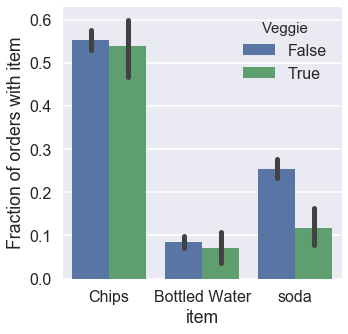

In [4]:
df_plt = df_orders.set_index('Veggie')
df_plt = df_plt.stack().reset_index().rename(columns={'level_1': 'item', 0: 'value'})
df_plt = df_plt[df_plt['item'].isin(['Chips', 'Bottled Water', 'soda'])]
plt.figure(figsize=(5,5))
with sns.plotting_context('poster'):
    sns.barplot(x='item', hue='Veggie', y='value', data=df_plt)
plt.ylabel('Fraction of orders with item')

# Different purchases with bowls and burritos

/Users/scott/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


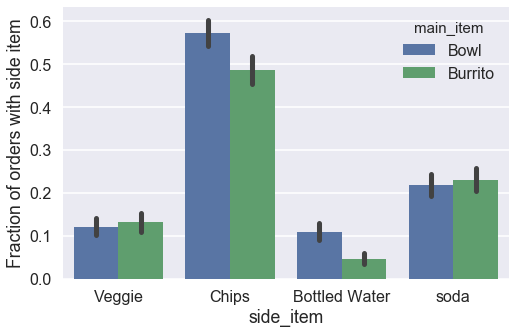

In [5]:
# Differentiate orders for bowls and burritos
cols_keep = ['Veggie', 'Chips', 'Bottled Water', 'soda']
df_bowl = df_orders[df_orders['Bowl']][cols_keep]
df_bowl['main_item'] = 'Bowl'
df_burrito = df_orders[df_orders['Burrito']][cols_keep]
df_burrito['main_item'] = 'Burrito'
df_bb = pd.concat([df_bowl, df_burrito])

df_plt = df_bb.set_index('main_item')
df_plt = df_plt.stack().reset_index().rename(columns={'level_1': 'side_item', 0: 'value'})
df_plt = df_plt[df_plt['side_item'].isin(cols_keep)]
plt.figure(figsize=(8,5))
with sns.plotting_context('poster'):
    sns.barplot(x='side_item', hue='main_item', y='value', data=df_plt)
plt.ylabel('Fraction of orders with side item')